<h3><b>Objective:</b> Refer table 5: From year 1983 to 2009-10, check the impact of time on non-literacy at 
5% level of significance using Kruskal-Wallis test</h3>

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

<h4>Kruskal-Wallis Test for Non-Literacy Trends</h4>

<p> Non-literacy data from Table 5 (1983 to 2009-10) </br>
Each list represents one demographic group across 6 time periods</p>

In [3]:
rural_male = [52.9, 49.8, 44.4, 40.0, 34.2, 26.0]
rural_female = [87.0, 84.8, 79.9, 75.3, 67.8, 49.8]
urban_male = [22.6, 20.5, 18.5, 16.1, 13.2, 10.4]
urban_female = [60.3, 54.5, 43.7, 43.7, 30.7, 23.6]

years = ['1983', '1987-88', '1993-94', '1999-2000', '2004-05', '2009-10']

print("Data Overview:")
print(f"Rural Male:    {rural_male}")
print(f"Rural Female:  {rural_female}")
print(f"Urban Male:    {urban_male}")
print(f"Urban Female:  {urban_female}")
print(f"Time Periods:  {years}\n")


Data Overview:
Rural Male:    [52.9, 49.8, 44.4, 40.0, 34.2, 26.0]
Rural Female:  [87.0, 84.8, 79.9, 75.3, 67.8, 49.8]
Urban Male:    [22.6, 20.5, 18.5, 16.1, 13.2, 10.4]
Urban Female:  [60.3, 54.5, 43.7, 43.7, 30.7, 23.6]
Time Periods:  ['1983', '1987-88', '1993-94', '1999-2000', '2004-05', '2009-10']



<p> Creating DataFrame for better analysis</p>

In [4]:
data_dict = {
    'Year': years * 4,
    'Non_Literacy': rural_male + rural_female + urban_male + urban_female,
    'Group': ['Rural Male']*6 + ['Rural Female']*6 + ['Urban Male']*6 + ['Urban Female']*6
}

df = pd.DataFrame(data_dict)
print("📈 Data Summary:")
print(df.groupby('Year')['Non_Literacy'].describe())

📈 Data Summary:
           count    mean        std   min     25%    50%     75%   max
Year                                                                  
1983         4.0  55.700  26.484587  22.6  45.325  56.60  66.975  87.0
1987-88      4.0  52.400  26.321981  20.5  42.475  52.15  62.075  84.8
1993-94      4.0  46.625  25.243795  18.5  37.400  44.05  53.275  79.9
1999-2000    4.0  43.775  24.317261  16.1  34.025  41.85  51.600  75.3
2004-05      4.0  36.475  22.814524  13.2  26.325  32.45  42.600  67.8
2009-10      4.0  27.450  16.402744  10.4  20.300  24.80  31.950  49.8


<p>Visualize the trends</p>

In [5]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<h4>Line Plot</h4>

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '1983'),
  Text(1, 0, '1987-88'),
  Text(2, 0, '1993-94'),
  Text(3, 0, '1999-2000'),
  Text(4, 0, '2004-05'),
  Text(5, 0, '2009-10')])

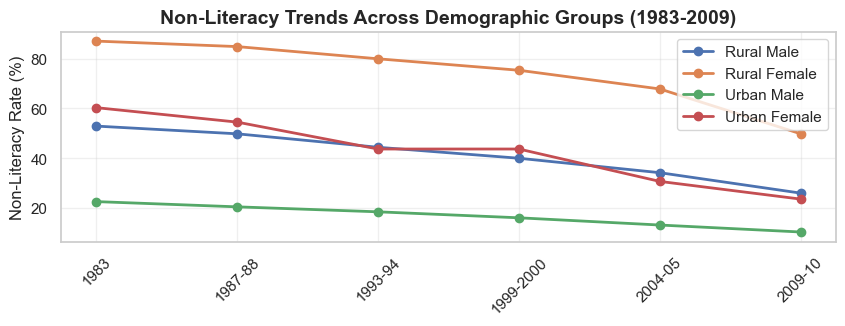

In [6]:
plt.subplot(2, 1, 1)
for group in df['Group'].unique():
    group_data = df[df['Group'] == group]
    plt.plot(group_data['Year'], group_data['Non_Literacy'], marker='o', label=group, linewidth=2)

plt.title('Non-Literacy Trends Across Demographic Groups (1983-2009)', fontsize=14, fontweight='bold')
plt.ylabel('Non-Literacy Rate (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

<h4>Box Plot</h4>

C:\Users\imrit\AppData\Local\Temp\ipykernel_17380\651707514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y='Non_Literacy', palette='viridis')


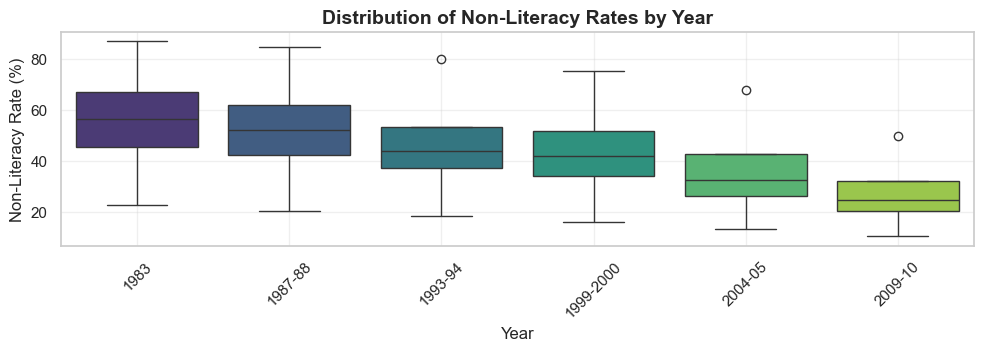

In [7]:
plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='Year', y='Non_Literacy', palette='viridis')
plt.title('Distribution of Non-Literacy Rates by Year', fontsize=14, fontweight='bold')
plt.ylabel('Non-Literacy Rate (%)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<h3>KRUSKAL-WALLIS TEST ANALYSIS</h3>

In [8]:
# Prepare data for Kruskal-Wallis test
# Group non-literacy rates by year
year_groups = []
for year in years:
    year_data = df[df['Year'] == year]['Non_Literacy'].values
    year_groups.append(year_data)
    print(f"{year}: {year_data}")

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*year_groups)

1983: [52.9 87.  22.6 60.3]
1987-88: [49.8 84.8 20.5 54.5]
1993-94: [44.4 79.9 18.5 43.7]
1999-2000: [40.  75.3 16.1 43.7]
2004-05: [34.2 67.8 13.2 30.7]
2009-10: [26.  49.8 10.4 23.6]


<h4>Test Result</h4>

In [9]:
print(f"Kruskal-Wallis H Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.6f}")

Kruskal-Wallis H Statistic: 4.1236
P-value: 0.531763


<p>Hypothesis Testing (α = 0.05):</p>
<p>Null Hypothesis (H0): No significant difference in non-literacy rates across years</p>
<p>Alternative Hypothesis (H1): Significant difference in non-literacy rates across years</p>


In [12]:
alpha = 0.05
if p_value < alpha:
    print(f"RESULT: Reject H0 - Time has significant impact on non-literacy rates")
    print("There are statistically significant differences in non-literacy rates across the years.")
else:
    print(f"RESULT: Fail to reject H0 - No significant impact of time on non-literacy rates")
    print("There are no statistically significant differences in non-literacy rates across the years.")


RESULT: Fail to reject H0 - No significant impact of time on non-literacy rates
There are no statistically significant differences in non-literacy rates across the years.


<h4> Effect Size Interpretation</h4>

In [13]:
if p_value < 0.001:
    print("   Very strong evidence against H0")
elif p_value < 0.01:
    print("   Strong evidence against H0")
elif p_value < 0.05:
    print("   Moderate evidence against H0")
elif p_value < 0.1:
    print("   Weak evidence against H0")
else:
    print("   No evidence against H0")


   No evidence against H0


<h4>Additional Statistics:</h4>

In [14]:
for i, year in enumerate(years):
    median_val = np.median(year_groups[i])
    mean_val = np.mean(year_groups[i])
    std_val = np.std(year_groups[i])
    print(f"{year}: Mean = {mean_val:.1f}%, Median = {median_val:.1f}%, Std = {std_val:.1f}")

# Calculate overall trends
overall_means = [np.mean(group) for group in year_groups]
trend_slope = (overall_means[-1] - overall_means[0]) / (len(years) - 1)

1983: Mean = 55.7%, Median = 56.6%, Std = 22.9
1987-88: Mean = 52.4%, Median = 52.1%, Std = 22.8
1993-94: Mean = 46.6%, Median = 44.0%, Std = 21.9
1999-2000: Mean = 43.8%, Median = 41.9%, Std = 21.1
2004-05: Mean = 36.5%, Median = 32.5%, Std = 19.8
2009-10: Mean = 27.5%, Median = 24.8%, Std = 14.2


<h4>Overall Trend Analysis:</h4>

In [15]:
print(f"Average non-literacy rate decreased from {overall_means[0]:.1f}% to {overall_means[-1]:.1f}%")
print(f"Average annual decrease: {abs(trend_slope):.2f} percentage points")

print(f"\n💡 Conclusion:")
if p_value < alpha:
    print("The Kruskal-Wallis test confirms that time period significantly affects non-literacy rates.")
    print("This suggests that educational policies and interventions over the years have had measurable impact.")
else:
    print("The Kruskal-Wallis test does not show significant differences in non-literacy rates across years.")
    print("This might indicate consistent patterns or that other factors beyond time are more influential.")

Average non-literacy rate decreased from 55.7% to 27.5%
Average annual decrease: 5.65 percentage points

💡 Conclusion:
The Kruskal-Wallis test does not show significant differences in non-literacy rates across years.
This might indicate consistent patterns or that other factors beyond time are more influential.


<h3>Analysis Completed</h3>